# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается 

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [3]:
df = pd.read_csv("gt_2015.csv")

df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1  1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2  0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3  1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4  1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   

       CO      NOX  
0  7.4491  113.250  
1  6.4684  112.020  
2  3.6335   88.147  
3  3.1972   87.078  
4  2.3833   82.515

In [4]:
df.shape

(7384, 11)

In [5]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.describe()

AT          AP           AH         AFDP         GTEP  \
count  7384.000000  7384.00000  7384.000000  7384.000000  7384.000000   
mean     17.225259  1014.50911    68.647464     3.598909    26.130149   
std       8.095783     6.89543    13.541116     0.610226     4.473737   
min      -6.234800   989.40000    24.085000     2.368800    17.698000   
25%      11.073250  1009.67500    59.447250     3.117300    23.147000   
50%      17.456500  1014.00000    70.952000     3.538500    25.331000   
75%      23.684750  1018.30000    79.653750     4.194825    30.018250   
max      37.103000  1036.60000    96.666000     5.239500    40.716000   

               TIT          TAT          TEY          CDP           CO  \
count  7384.000000  7384.000000  7384.000000  7384.000000  7384.000000   
mean   1078.974689   546.642484   133.993380    12.097025     3.129986   
std      19.762449     5.489066    16.179208     1.136601     2.234962   
min    1016.000000   516.040000   100.020000     9.870800     0.212800   
25%    1070.500000   544.747500   126.255000    11.465750     1.808175   
50%    1080.300000   549.720000   131.600000    11.933000     2.533400   
75%    1099.900000   550.030000   147.160000    13.148000     3.702550   
max    1100.400000   550.590000   179.500000    15.159000    41.097000   

               NOX  
count  7384.000000  
mean     59.890509  
std      11.132464  
min      25.905000  
25%      52.399000  
50%      56.838500  
75%      65.093250  
max     119.680000

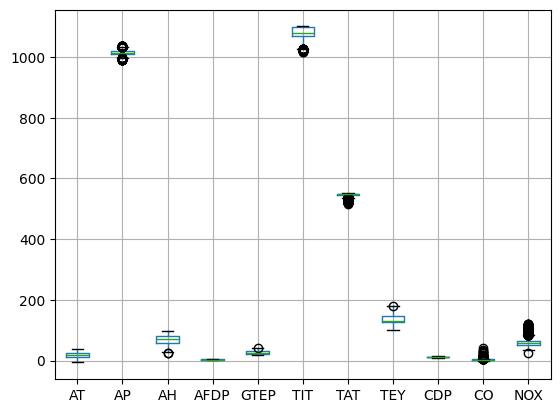

In [7]:
df.boxplot();

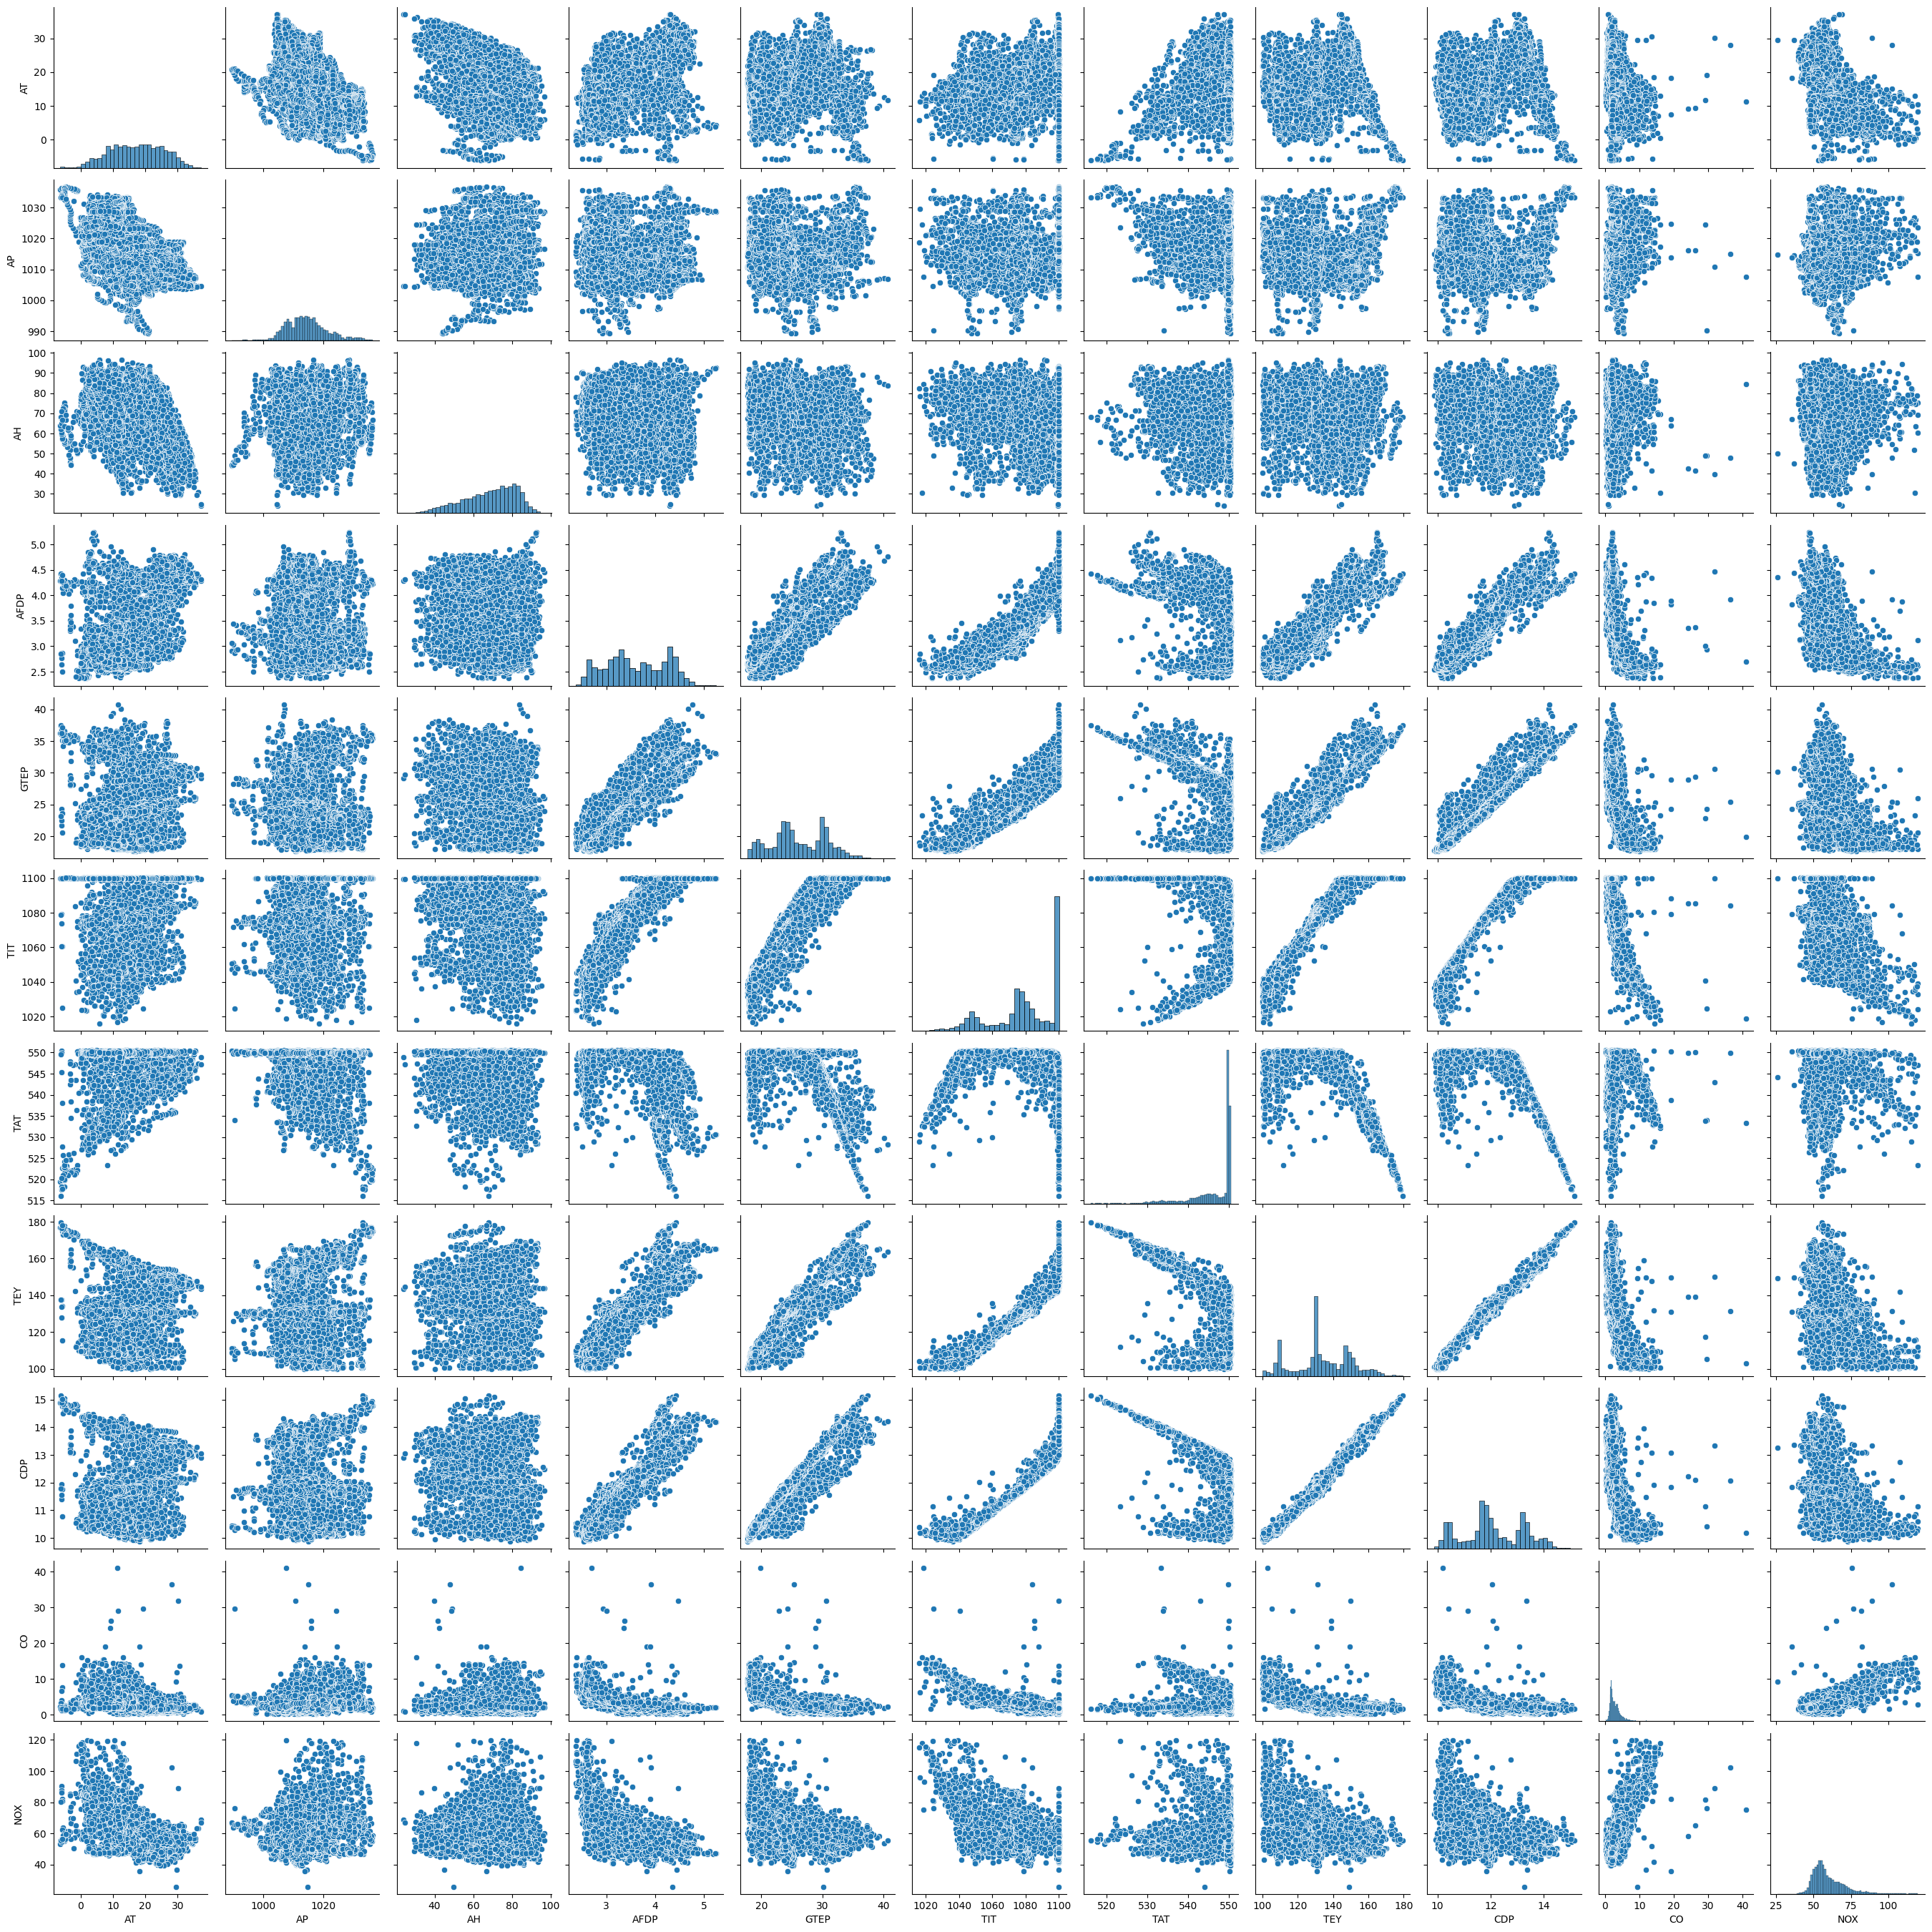

In [8]:
sns.pairplot(df)
plt.show()

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

Отличаются по производительности + аномально выбивающиеся

Количество: 3-4

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [9]:
scaler = StandardScaler()

tmp = scaler.fit_transform(df)

df = pd.DataFrame(tmp, columns=df.columns)

In [10]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters = dbscan.fit_predict(df)

df["Cluster"] = clusters

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

In [11]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
Cluster                                                                         
-1      -0.937181  0.516861 -0.050492 -0.536735 -0.250944 -0.823092 -0.880522   
 0       0.055733 -0.044368  0.001743  0.017931  0.002744  0.033113  0.062087   
 1      -2.653501  2.898584 -0.506303  1.034232  2.128651  1.062376 -4.530913   
 2      -0.340170 -2.904165 -0.164434 -1.279191 -0.547525 -1.411426  0.625076   
 3       0.410271 -3.537477 -1.699418 -1.056171 -0.341270 -1.542998  0.633578   
 4      -0.294485 -2.609022  0.514385 -1.436029 -1.042409 -1.327929  0.619610   
 5      -2.019349  1.161847  0.527915 -1.548924 -1.626331 -1.702402  0.219515   
 6      -0.403644 -1.110827  0.832782  1.566424  1.998320  1.053010 -2.952885   
 7       0.105462 -1.292119 -0.926633  1.434442  2.258746  1.066504 -2.519266   
 8      -0.428026  0.352975  1.184164  1.668614  1.510951  1.068312 -3.403812   
 9       1.155364 -0.285587 -1.685165  1.041179  2.472340  1.061950 -0.946033   
 10     -0.410601  2.587840 -0.765186 -1.617523 -1.777862 -2.433013 -1.076182   
 11      0.040760  1.650448  0.665228 -1.576860 -1.798801 -2.104988  0.088619   
 12     -1.327919  1.947928  1.311223  0.708374 -0.017165  0.613595  0.572143   

              TEY       CDP        CO       NOX  
Cluster                                          
-1      -0.407414 -0.386564  1.900509  1.771371  
 0       0.007461  0.006721 -0.080142 -0.079703  
 1       2.524173  2.373074 -0.473187 -0.090222  
 2      -1.286618 -1.367056  0.878947  0.790144  
 3      -1.512128 -1.510476  0.941839  0.556158  
 4      -1.224497 -1.289040  0.775628  0.453853  
 5      -1.465357 -1.438619  2.686128  4.508875  
 6       1.628329  1.767210 -0.952618 -0.821034  
 7       1.407454  1.642560 -0.540731 -0.121950  
 8       1.767170  1.928415 -0.971002 -0.665712  
 9       1.099919  1.188867 -0.774567 -0.639570  
 10     -1.937797 -1.637548  3.844148  3.040750  
 11     -1.998794 -1.724188  2.374639  1.094944  
 12      0.610765  0.337112 -0.216268  0.291158

У аномальных электростанций высокий уровень выбросов

Остальные ранжированы по эффективности

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

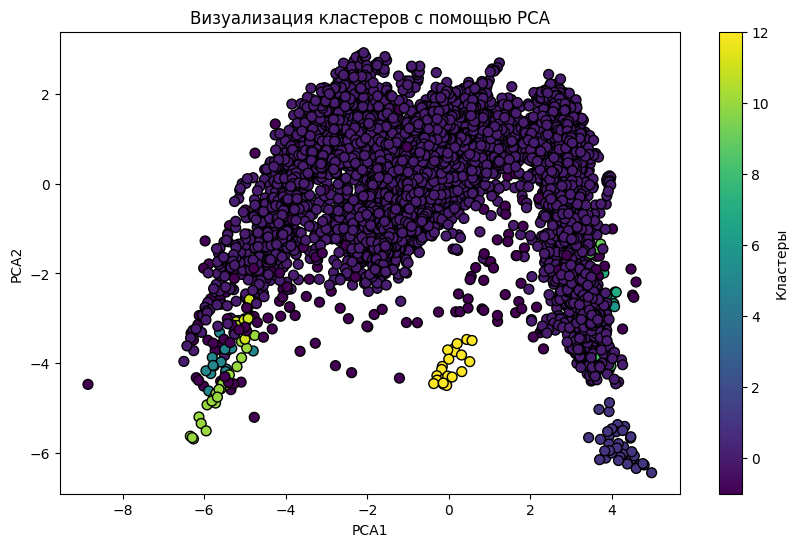

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap="viridis",
    marker="o",
    edgecolor="k",
    s=50,
)

plt.title("Визуализация кластеров с помощью PCA")

plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.colorbar(label="Кластеры")

plt.show()

**Как отправить работу на проверку**

Скачайте файл с работой в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.
